<a href="https://colab.research.google.com/github/avis108/MNIST_Digit_Data/blob/main/MNIST_Digits_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import  tensorflow as tf
import keras 
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#! pip install keras

In [2]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
curr_dir = os.getcwd()
path = curr_dir+'/sample_data'+'/mnist_train_small.csv'

In [4]:
data = np.genfromtxt(path, delimiter=',') 

In [15]:
sample_size = data.shape[0]
input_dim = 28
print('Total sample size : ' ,sample_size) 
print('Input dimension : ' ,data.shape) 

Total sample size :  20000
Input dimension :  (20000, 785)


In [6]:
#Creating placeholder arrays
training_x = np.zeros((sample_size,input_dim,input_dim))
training_y = np.zeros((sample_size,1))

In [7]:
#Reshaping the input matrix
for i in range(sample_size):
  training_y[i] = data[i][:1]
  arr = data[i].reshape((785,1))
  arr = arr[1:,:].reshape((28,28))
  training_x[i] = arr


In [8]:
#One hot encoding the output vector
OneHEnc = OneHotEncoder()
training_y = OneHEnc.fit_transform(training_y).toarray()

In [9]:
#Normalizing the values
training_x = training_x/255

In [10]:
#Specifiying model architecture
inputs = keras.Input(shape=(28,28) ,name = 'input_layer')
X = keras.layers.Flatten(name = 'input_layer_F')(inputs)
X = keras.layers.Dense(128,kernel_initializer='glorot_uniform',name = 'layer_1_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_1_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(256,kernel_initializer='glorot_uniform',name = 'layer_2_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_2_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(512,kernel_initializer='glorot_uniform',name = 'layer_3_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_3_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(256,kernel_initializer='glorot_uniform',name = 'layer_4_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_4_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(128,kernel_initializer='glorot_uniform',name = 'layer_5_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_5_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(10,kernel_initializer='glorot_uniform',name = 'layer_6_DL')(X)
X = keras.activations.softmax(X)
model = keras.Model(inputs = inputs,outputs = X)

In [11]:
#Model compiling
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
input_layer_F (Flatten)      (None, 784)               0         
_________________________________________________________________
layer_1_DL (Dense)           (None, 128)               100480    
_________________________________________________________________
layer_1_BNL (BatchNormalizat (None, 128)               512       
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
layer_2_DL (Dense)           (None, 256)               33024 

In [16]:
#Creating training and test dataset
X_train = training_x[:12000,:,:]
Y_train = training_y[:12000,:]

X_test = training_x[12000:16000,:,:]
Y_test = training_y[12000:16000,:]

print( "Training set size :", X_train.shape)
print( "Test set size :", X_test.shape)

Training set size : (12000, 28, 28)
Test set size : (4000, 28, 28)


In [14]:
model.fit( X_train,Y_train,batch_size=32, epochs=25)

Epoch 1/25
375/375 [==============================] - 6s 10ms/step - loss: 1.0219 - accuracy: 0.6720
Epoch 2/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3960 - accuracy: 0.8791
Epoch 3/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3175 - accuracy: 0.9052
Epoch 4/25
375/375 [==============================] - 4s 10ms/step - loss: 0.2619 - accuracy: 0.9227
Epoch 5/25
375/375 [==============================] - 4s 10ms/step - loss: 0.2397 - accuracy: 0.9269
Epoch 6/25
375/375 [==============================] - 4s 10ms/step - loss: 0.2142 - accuracy: 0.9336
Epoch 7/25
375/375 [==============================] - 4s 10ms/step - loss: 0.2057 - accuracy: 0.9390
Epoch 8/25
375/375 [==============================] - 4s 10ms/step - loss: 0.1827 - accuracy: 0.9455
Epoch 9/25
375/375 [==============================] - 4s 10ms/step - loss: 0.1684 - accuracy: 0.9504
Epoch 10/25
375/375 [==============================] - 4s 10ms/step - loss: 0.1683 - accura

In [17]:
model.evaluate( X_test,Y_test)

125/125 [==============================] - 1s 3ms/step - loss: 0.1790 - accuracy: 0.9635


[0.1789804995059967, 0.9635000228881836]

In [ ]:
model.save

It is a :  5


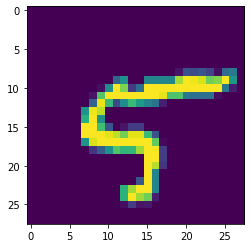

In [24]:
i = 8
print("It is a : ",np.argmax(model.predict(training_x[14014+i:14015+i,:,:])))
plt.imshow(training_x[14014 +i:14015+i,:,:][0])

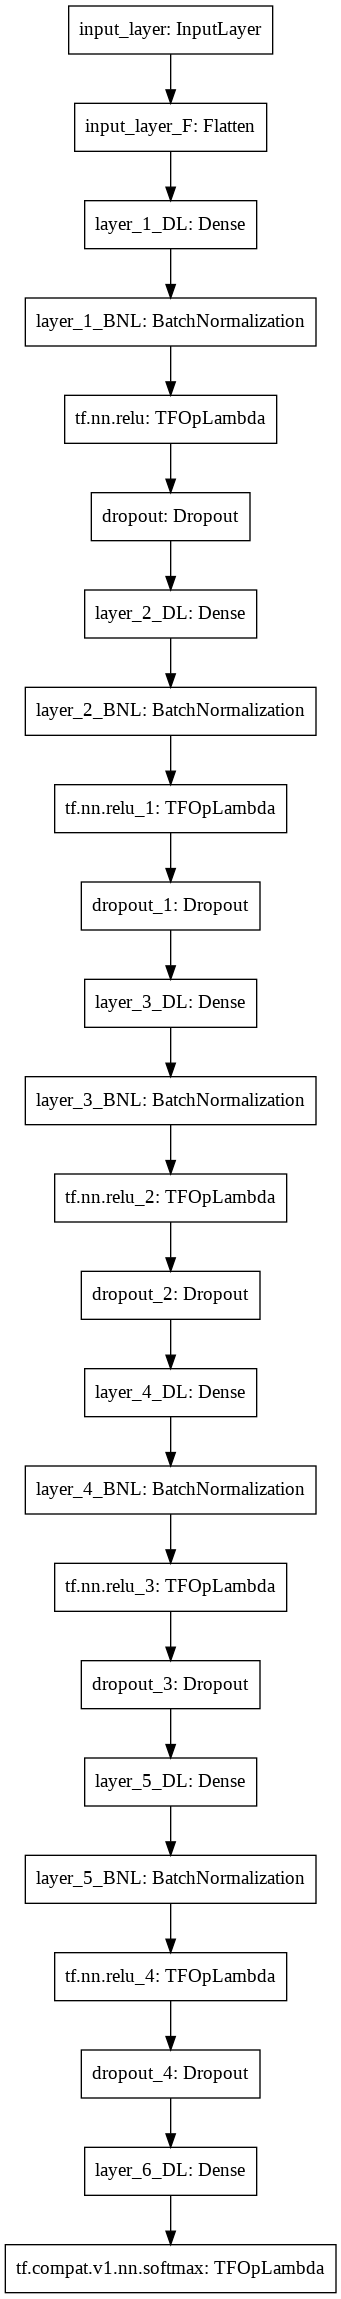

In [26]:
plot_model(model, to_file='model.png')